In [44]:
%pip install openpyxl pandas seaborn matplotlib scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro


In [2]:
#1. Afficher les 10 premières lignes du fichier
DataFrame = pd.read_excel('employes_dataset.xlsx', engine="openpyxl")
print(DataFrame.head(10))

   ID       Nom     Prénom  Âge   Sexe                         Email  \
0   1   Richard     Stacey   62  Homme        lgonzalez@crawford.org   
1   2     Chang    Loretta   65  Homme      rebeccabrown@hotmail.com   
2   3    Fisher   Kimberly   18  Homme  waynebarnes@schultz-sims.org   
3   4     Green      Julie   21  Homme       morgandevon@burgess.com   
4   5     Dixon      Jacob   21  Homme          elliskaren@gmail.com   
5   6  Sullivan        Ana   57  Femme         afranklin@hotmail.com   
6   7    Bowers     Rodney   27  Femme             rmiranda@hess.com   
7   8    Turner  Stephanie   37  Homme           uphillips@cohen.com   
8   9     Woods      Glenn   39  Homme       reidwilliam@hotmail.com   
9  10     Silva   Geoffrey   68  Homme    williamsalexis@beasley.biz   

                         Pays           Ville  Salaire (€) Date d'embauche  \
0         Trinidad and Tobago   New Devinview      54564.0      2023-09-30   
1                 Netherlands    Lake Rebecca      

In [3]:
#2. Afficher les noms de colonnes du fichier.
print(DataFrame.columns.tolist())

['ID', 'Nom', 'Prénom', 'Âge', 'Sexe', 'Email', 'Pays', 'Ville', 'Salaire (€)', "Date d'embauche", 'Département', 'Télétravail (%)', 'Performance (Note)']


In [4]:
#3. Compter le nombre d’hommes et de femmes.
print(DataFrame['Sexe'].value_counts())

Sexe
Femme    513
Homme    487
Name: count, dtype: int64


In [5]:
#4. Identifier les 5 pays les plus représentés.
print(DataFrame['Pays'].value_counts().head())

Pays
Congo          10
Tajikistan     10
Finland        10
Madagascar     10
New Zealand    10
Name: count, dtype: int64


In [6]:
#Calculer le salaire moyen, médian, minimum, maximum et l’écart-type à l’aide de NumPy.
print('Salaire moyen :', np.mean(DataFrame['Salaire (€)']))
print('Salaire médian :', np.median(DataFrame['Salaire (€)'].dropna()))
print('Salaire minimum :', np.min(DataFrame['Salaire (€)']))
print('Salaire maximum  :', np.max(DataFrame['Salaire (€)']))
print('Ecart-type  :', np.std(DataFrame['Salaire (€)']))



Salaire moyen : 69101.74196787148
Salaire médian : 69518.5
Salaire minimum : 18107.0
Salaire maximum  : 119836.0
Ecart-type  : 29703.03415310104


In [7]:
#6. Donner l’âge moyen par département.
print('Moyenne par deartement :',DataFrame.groupby('Département')['Âge'].mean())

Moyenne par deartement : Département
Finance         42.560694
Informatique    43.681529
Logistique      41.757764
Marketing       43.187500
Production      44.198795
RH              44.131148
Name: Âge, dtype: float64


In [8]:
#7. Trouver la ville ayant le plus grand nombre d’employés
print("La ville ayant le plus grand nombre d'employees :",DataFrame['Ville'].value_counts().idxmax())

La ville ayant le plus grand nombre d'employees : Lake Daniel


In [9]:
#8. Lister les 10 employés les mieux payés.
print('Les 10 employees les mieux payes :',DataFrame.nlargest(10,'Salaire (€)')[['Nom', 'Prénom','Salaire (€)']])

Les 10 employees les mieux payes :           Nom   Prénom  Salaire (€)
189     Allen     Anna     119836.0
817  Mitchell   Monica     119834.0
539   Fischer    Jesus     119810.0
714    Spears   Joshua     119790.0
384     Berry  Deborah     119664.0
129     Clark    James     119643.0
81    Leblanc   Nicole     119637.0
178    Howard    Brett     119515.0
487    Garcia   Nicole     119376.0
141  Williams  Darlene     119272.0


In [10]:
#9. Calculer le nombre d’employés par département et par sexe
print(pd.crosstab(DataFrame['Département'], DataFrame['Sexe']))

Sexe          Femme  Homme
Département               
Finance          91     82
Informatique     81     76
Logistique       89     72
Marketing        74     86
Production       88     78
RH               90     93


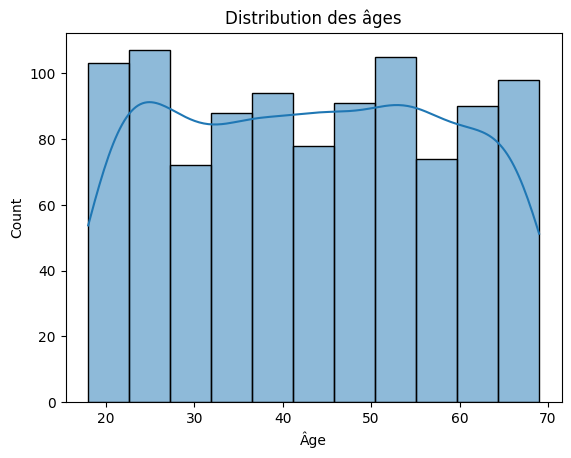

In [11]:
#10. Générer un graphique montrant la distribution des âges.
sns.histplot(DataFrame['Âge'], kde=True)
plt.title('Distribution des âges')
plt.show()

In [12]:
#11. Identifier les colonnes contenant des valeurs manquantes.
print(DataFrame.isna().sum()[DataFrame.isna().sum() > 0])

Salaire (€)            4
Télétravail (%)       54
Performance (Note)    48
dtype: int64


In [13]:
#12. Remplacer les NaN de la colonne ‘Télétravail (%)’ par la moyenne de cette colonne
DataFrame['Télétravail (%)'] = DataFrame['Télétravail (%)'].fillna(DataFrame['Télétravail (%)'].mean())

In [14]:
#13. Remplacer les NaN de la colonne ‘Télétravail (%)’ par une valeur estimée pertinente (par exemple, la moyenne par département ou selon l’âge).
DataFrame['Télétravail (%)'] = DataFrame.groupby('Département')['Télétravail (%)'].transform(lambda x: x.fillna(x.mean()))

In [15]:
#14. Supprimer les lignes dont la colonne ‘Performance (Note)’ est manquante.
DataFrame = DataFrame.dropna(subset=['Performance (Note)'])

In [16]:
#Proposez une stratégie pertinente pour gérer les valeurs manquantes dans ‘Performance (Note)’ : suppression, remplissage conditionnel, ou autre — justifiez votre choix.

In [17]:
#16. Convertir la colonne ‘Date d’embauche’ en format datetime
DataFrame['Date d\'embauche'] = pd.to_datetime(DataFrame['Date d\'embauche'])

In [18]:
#17. Créer une colonne ‘Ancienneté (années)’ basée sur la date d’embauche
DataFrame['Ancienneté (années)'] = (pd.to_datetime('today') - DataFrame['Date d\'embauche']).dt.days / 365

In [19]:
#18. Supprimer les doublons éventuels du fichier.
DataFrame = DataFrame.drop_duplicates()

In [20]:
#19. Uniformiser les majuscules dans les colonnes ‘Nom’, ‘Prénom’, ‘Ville’, ‘Pays’.
DataFrame['Nom'] = DataFrame['Nom'].str.title()
DataFrame['Prénom'] = DataFrame['Prénom'].str.title()
DataFrame['Ville'] = DataFrame['Ville'].str.title()
DataFrame['Pays'] = DataFrame['Pays'].str.title()
print(DataFrame)

       ID       Nom    Prénom  Âge   Sexe                         Email  \
0       1   Richard    Stacey   62  Homme        lgonzalez@crawford.org   
1       2     Chang   Loretta   65  Homme      rebeccabrown@hotmail.com   
2       3    Fisher  Kimberly   18  Homme  waynebarnes@schultz-sims.org   
3       4     Green     Julie   21  Homme       morgandevon@burgess.com   
4       5     Dixon     Jacob   21  Homme          elliskaren@gmail.com   
..    ...       ...       ...  ...    ...                           ...   
995   996  Williams     Holly   54  Femme       paigewilliams@gmail.com   
996   997  Martinez     Kayla   19  Homme         stephanie53@yahoo.com   
997   998     Noble    Alexis   47  Homme           deborah59@gmail.com   
998   999       Fry    Amanda   23  Homme             sarah24@gmail.com   
999  1000  Castillo   Michael   34  Homme          utate@smith-wood.com   

                                             Pays           Ville  \
0                             

In [21]:
#20. Créer une colonne ‘Email valide’ qui indique si l’e-mail semble valide (xxx@xx.xx’).
DataFrame['Email valide'] = DataFrame['Email'].str.contains(r'^[^@]+@[^@]+\.[^@]+$', regex=True) 

In [22]:
#21.  Supprimer les valeurs extrêmes (outliers) dans la colonne ‘Salaire’ en utilisant l’écart interquartile (IQR).
Q1 = DataFrame['Salaire (€)'].quantile(0.25)
Q3 = DataFrame['Salaire (€)'].quantile(0.75)
IQR = Q3 - Q1
DataFram = DataFrame[~((DataFrame['Salaire (€)'] < (Q1 - 1.5 * IQR)) | (DataFrame['Salaire (€)'] > (Q3 + 1.5 * IQR)))]

In [23]:
#22. Vérifier si la distribution des âges suit une loi normale à l’aide de NumPy
stat, p = shapiro(DataFrame['Âge'])
print('Statistique=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Distribution normale')
else:
    print('Distribution non normale')


Statistique=0.949, p=0.000
Distribution non normale


In [24]:
#Créer une colonne ‘prime’ : si la performance est ≥ 4 et l’ancienneté ≥ 5 ans → 1000, sinon 0 (avec NumPy).
DataFrame['prime'] = np.where((DataFrame['Performance (Note)'] >= 4) & (DataFrame['Ancienneté (années)'] >= 5), 1000, 0)


In [25]:
#24. Encoder la colonne ‘Sexe’ en valeurs numériques (0 pour Femme, 1 pour Homme)
DataFrame['Sexe'] = DataFrame['Sexe'].map({'Femme': 0, 'Homme': 1})

In [26]:
#25. Utilisez pd.cut() pour créer une nouvelle colonne ‘Tranche d’âge’ avec les intervalles suivants : 0-25, 26-30, 31-40
DataFrame['Tranche d\'âge'] = pd.cut(DataFrame['Âge'], bins=[0, 25, 30, 40], labels=['0-25', '26-30', '31-40'])

In [27]:
#26. Ajouter une colonne de langages fictive et utiliser explode()
langages = ['Python', 'Java', 'SQL', 'R']
DataFrame['Langages'] = [langages[:np.random.randint(1, 5)] for _ in range(len(DataFrame))]
df_exploded = DataFrame.explode('Langages').head(20)

In [28]:
# 27. MultiIndex avec stack() et unstack()
multi_df = DataFrame.set_index(['Département', 'Sexe']).sample(5)
stacked = multi_df.stack().unstack()





In [29]:
# 28. Détecter les outliers dans 'Salaire (€)'
Q1 = DataFrame['Salaire (€)'].quantile(0.25)
Q3 = DataFrame['Salaire (€)'].quantile(0.75)
IQR = Q3 - Q1
outliers = DataFrame[(DataFrame['Salaire (€)'] < (Q1 - 1.5 * IQR)) | (DataFrame['Salaire (€)'] > (Q3 + 1.5 * IQR))]

In [30]:
# 29. Encoder la colonne 'Département' avec get_dummies()
departement_dummies = pd.get_dummies(DataFrame['Département'], prefix='Département')

In [31]:
# 30. Ajouter une colonne de date fictive
DataFrame['Date inscription'] = pd.date_range(start='1/1/2010', periods=len(DataFrame), freq='D')
DataFrame['Année inscription'] = DataFrame['Date inscription'].dt.year
DataFrame['Mois inscription'] = DataFrame['Date inscription'].dt.month

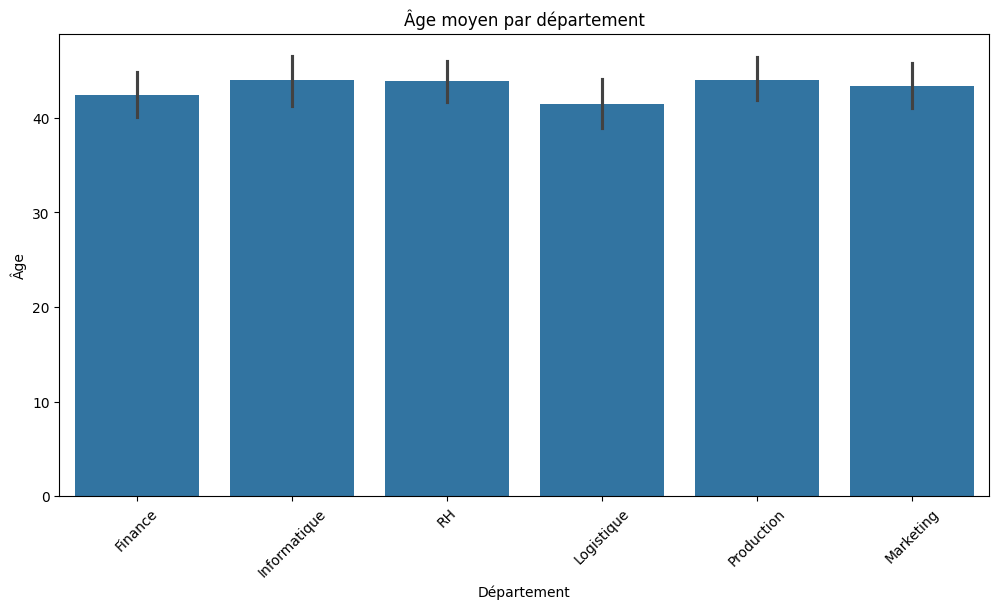

In [32]:
# 32. Barplot de l'âge moyen par département
plt.figure(figsize=(12, 6))
sns.barplot(x='Département', y='Âge', data=DataFrame, estimator=np.mean)
plt.title('Âge moyen par département')
plt.xticks(rotation=45)
plt.show()

In [33]:
# 33. Sauvegarder le DataFrame nettoyé
DataFrame.to_excel('employes_nettoyé.xlsx', index=False)

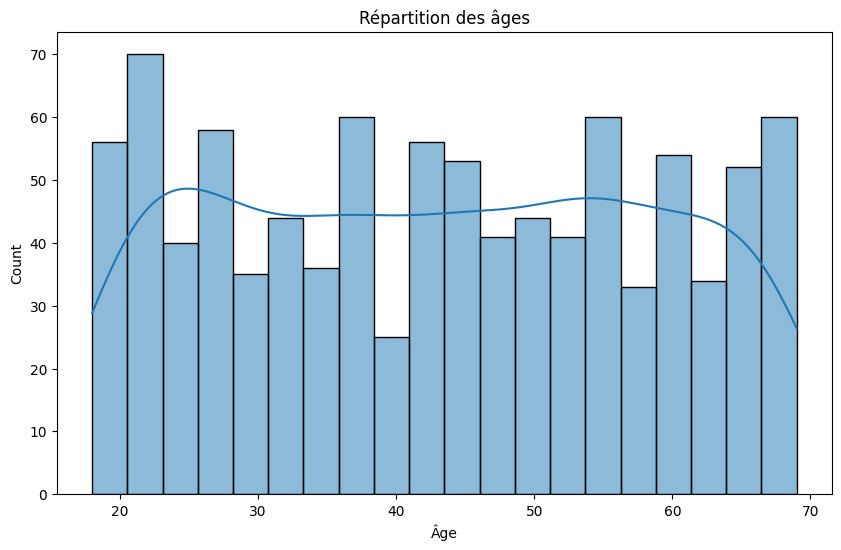

In [34]:
# 34. Histogramme de la répartition des âges
plt.figure(figsize=(10, 6))
sns.histplot(DataFrame['Âge'], kde=True, bins=20)
plt.title('Répartition des âges')
plt.show()


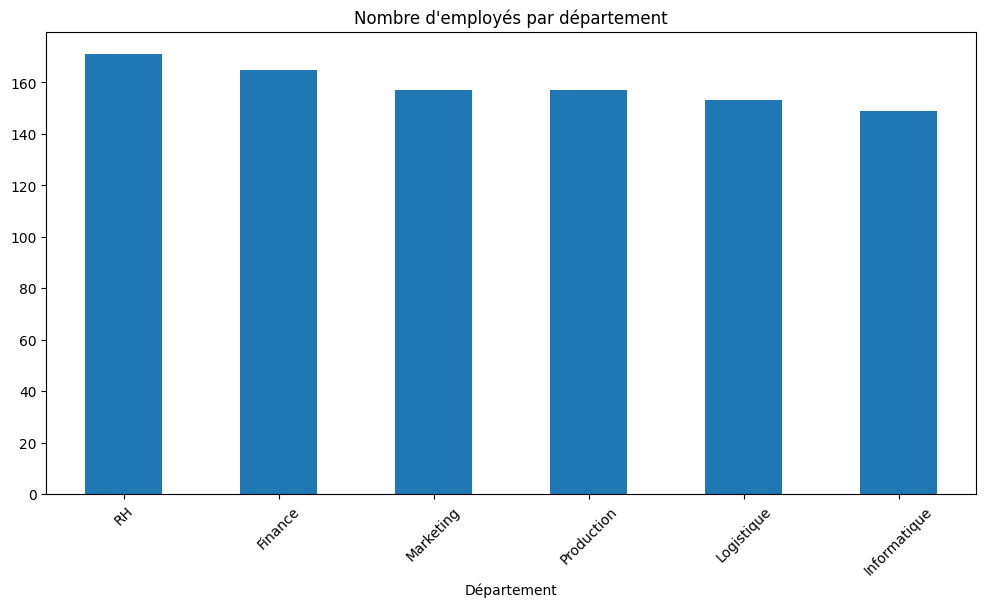

In [35]:
# 35. Graphique à barres du nombre d'employés par département
plt.figure(figsize=(12, 6))
DataFrame['Département'].value_counts().plot(kind='bar')
plt.title('Nombre d\'employés par département')
plt.xticks(rotation=45)
plt.show()

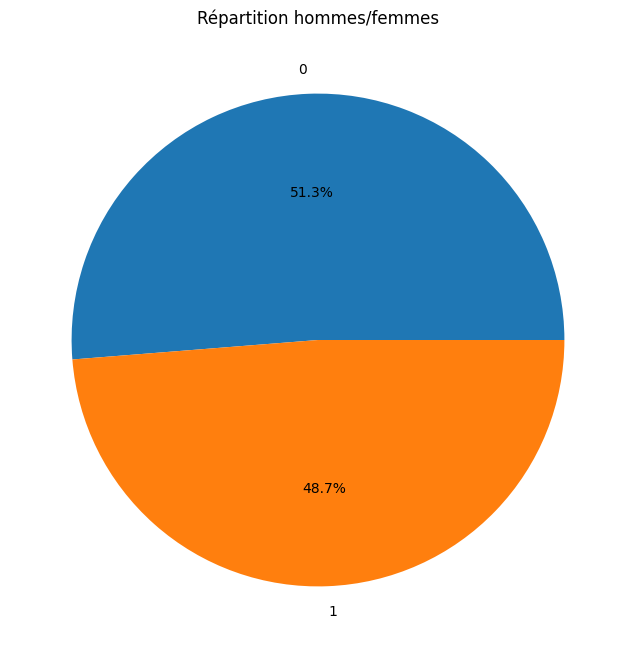

In [36]:
# 36. Camembert de la répartition hommes/femmes
plt.figure(figsize=(8, 8))
DataFrame['Sexe'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Répartition hommes/femmes')
plt.ylabel('')
plt.show()

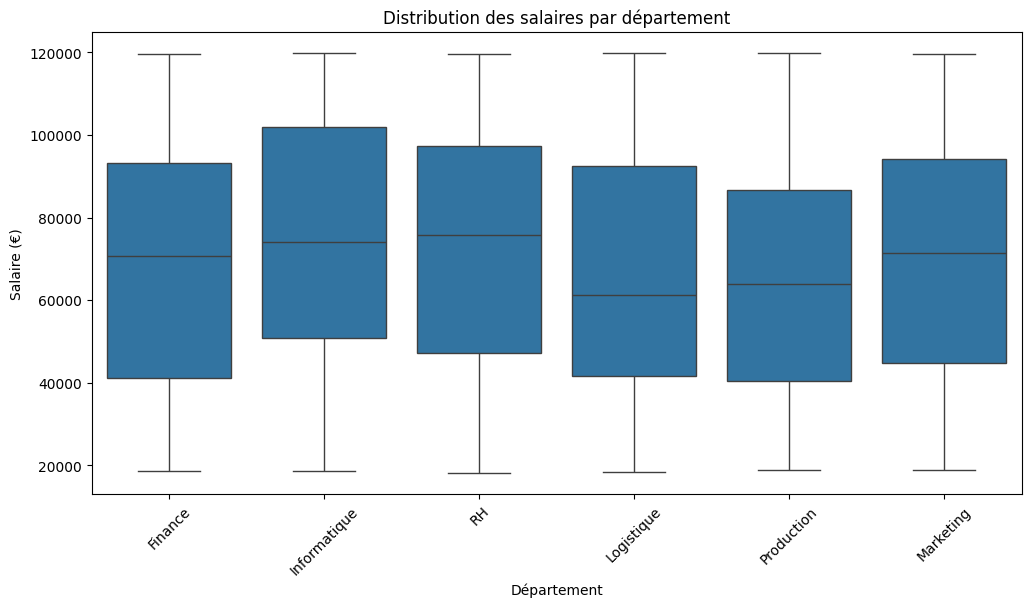

In [37]:
# 37. Boxplot des salaires par département
plt.figure(figsize=(12, 6))
sns.boxplot(x='Département', y='Salaire (€)', data=DataFrame)
plt.title('Distribution des salaires par département')
plt.xticks(rotation=45)
plt.show()

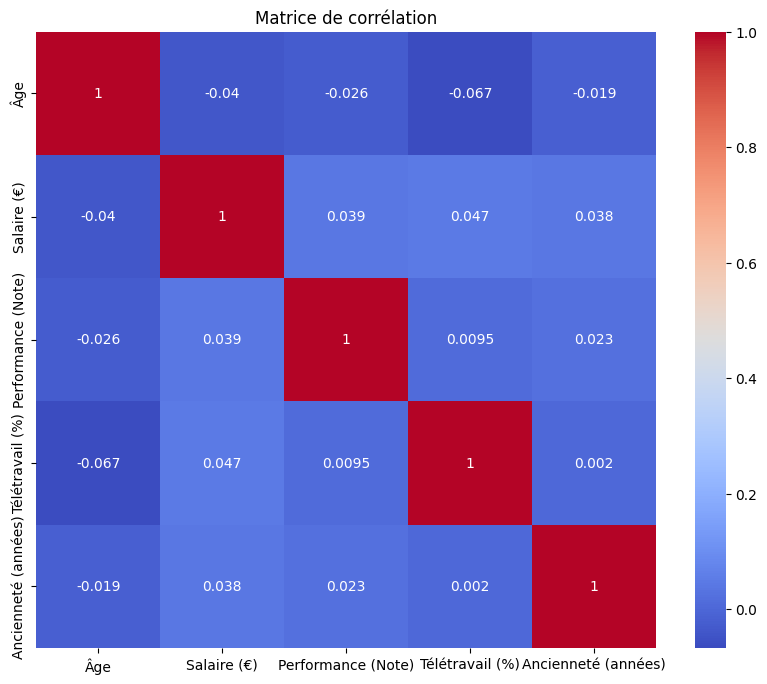

In [38]:
# 38. Heatmap de corrélation
plt.figure(figsize=(10, 8))
numeric_cols = ['Âge', 'Salaire (€)', 'Performance (Note)', 'Télétravail (%)', 'Ancienneté (années)']
sns.heatmap(DataFrame[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()


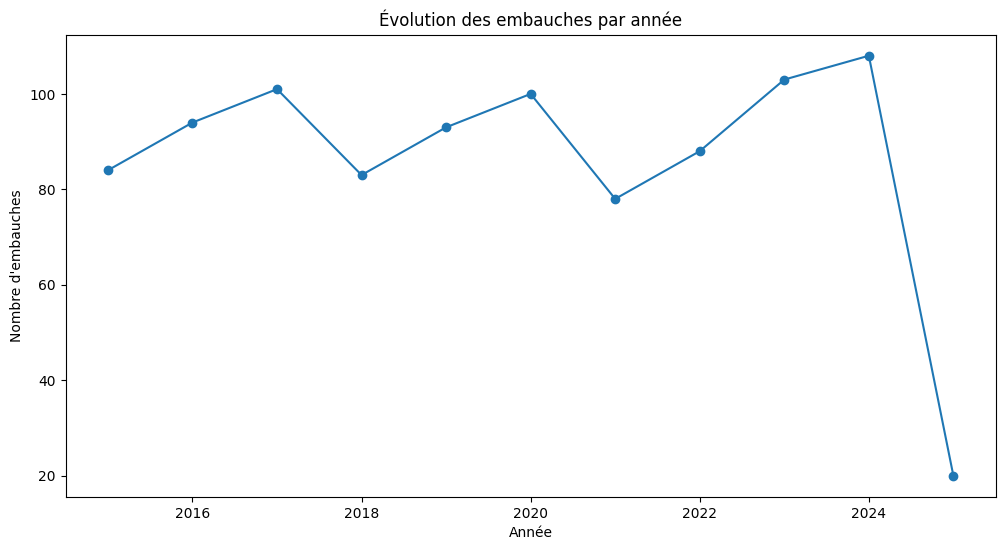

In [39]:
# 39. Courbe d'évolution des embauches par année
plt.figure(figsize=(12, 6))
DataFrame['Année embauche'] = DataFrame['Date d\'embauche'].dt.year
DataFrame['Année embauche'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Évolution des embauches par année')
plt.xlabel('Année')
plt.ylabel('Nombre d\'embauches')
plt.show()

C:\Users\SARA\AppData\Local\Temp\ipykernel_3632\2234592070.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


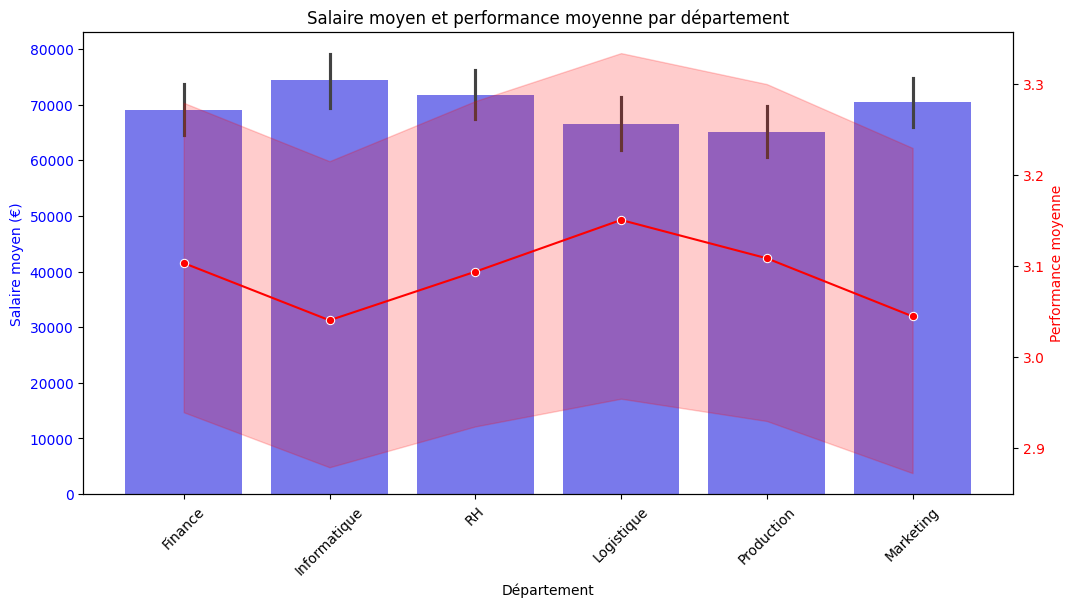

In [40]:
# 40. Graphique combiné salaire moyen et performance moyenne par département
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot(x='Département', y='Salaire (€)', data=DataFrame, estimator=np.mean, ax=ax1, color='b', alpha=0.6)
ax1.set_ylabel('Salaire moyen (€)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

ax2 = ax1.twinx()
sns.lineplot(x='Département', y='Performance (Note)', data=DataFrame, estimator=np.mean, 
             ax=ax2, color='r', marker='o', sort=False)
ax2.set_ylabel('Performance moyenne', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Salaire moyen et performance moyenne par département')
plt.show()

C:\Users\SARA\AppData\Local\Temp\ipykernel_3632\1610925229.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(DataFrame['Salaire (€)'], shade=True)


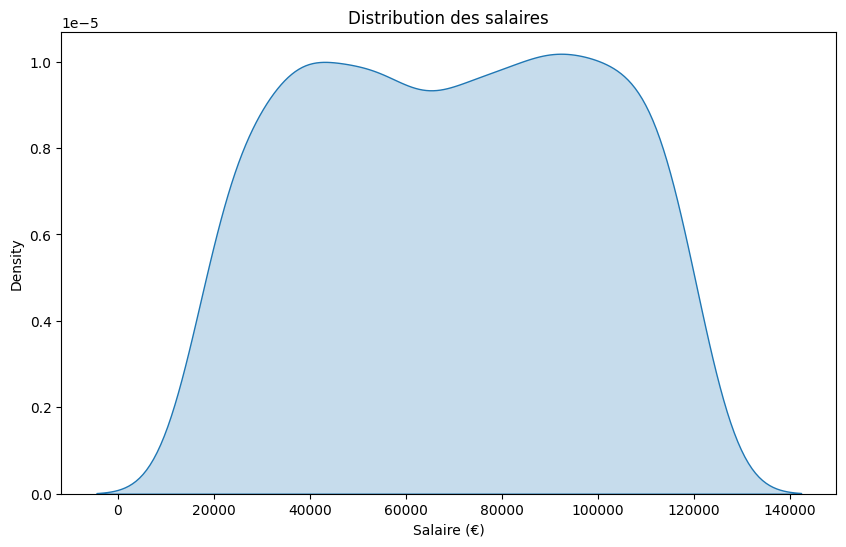

In [41]:
# 41. KDE plot des salaires
plt.figure(figsize=(10, 6))
sns.kdeplot(DataFrame['Salaire (€)'], shade=True)
plt.title('Distribution des salaires')
plt.show()

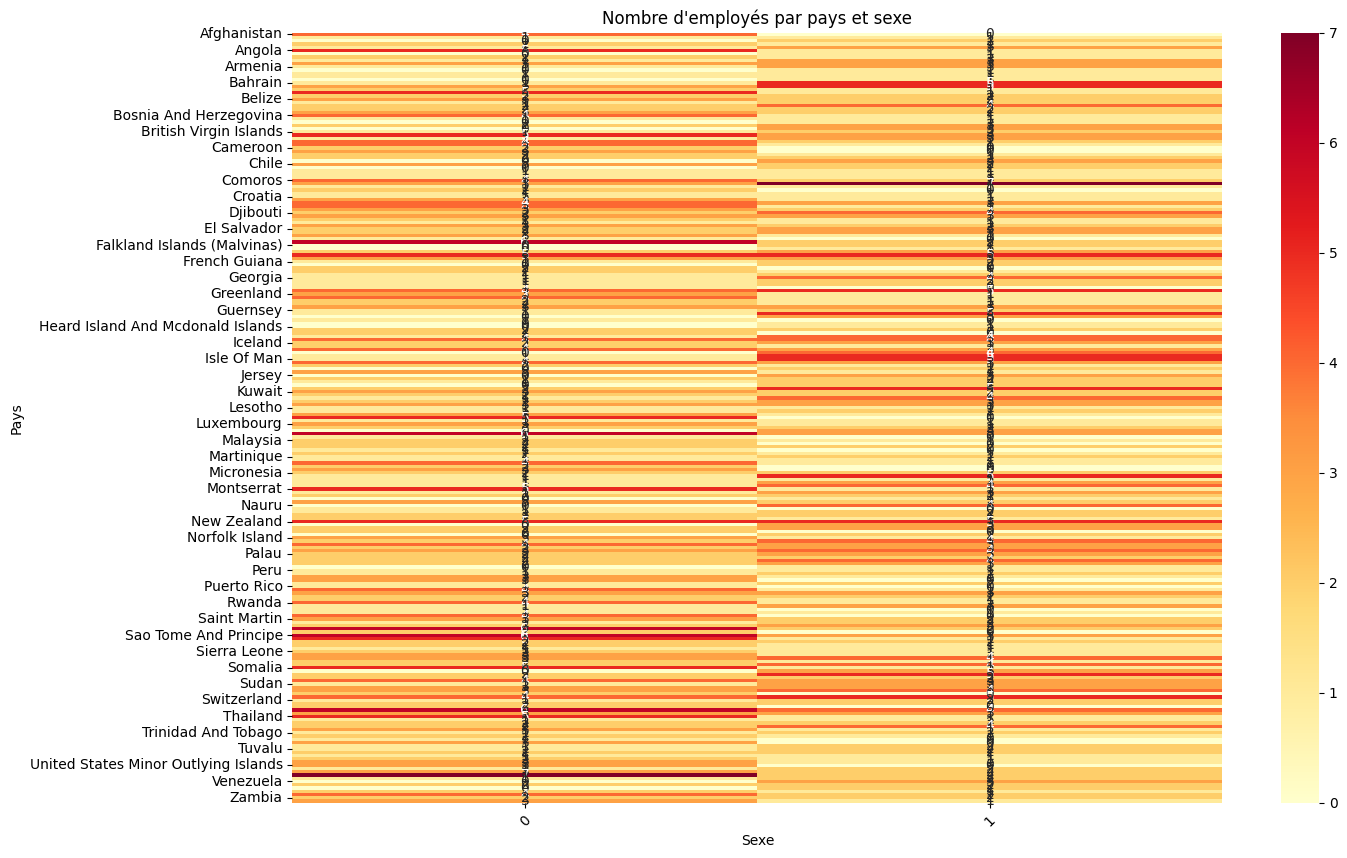

In [42]:
# 42. Heatmap du nombre d'employés par pays et sexe
cross_tab = pd.crosstab(DataFrame['Pays'], DataFrame['Sexe'])
plt.figure(figsize=(15, 10))
sns.heatmap(cross_tab, cmap='YlOrRd', annot=True, fmt='d')
plt.title('Nombre d\'employés par pays et sexe')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

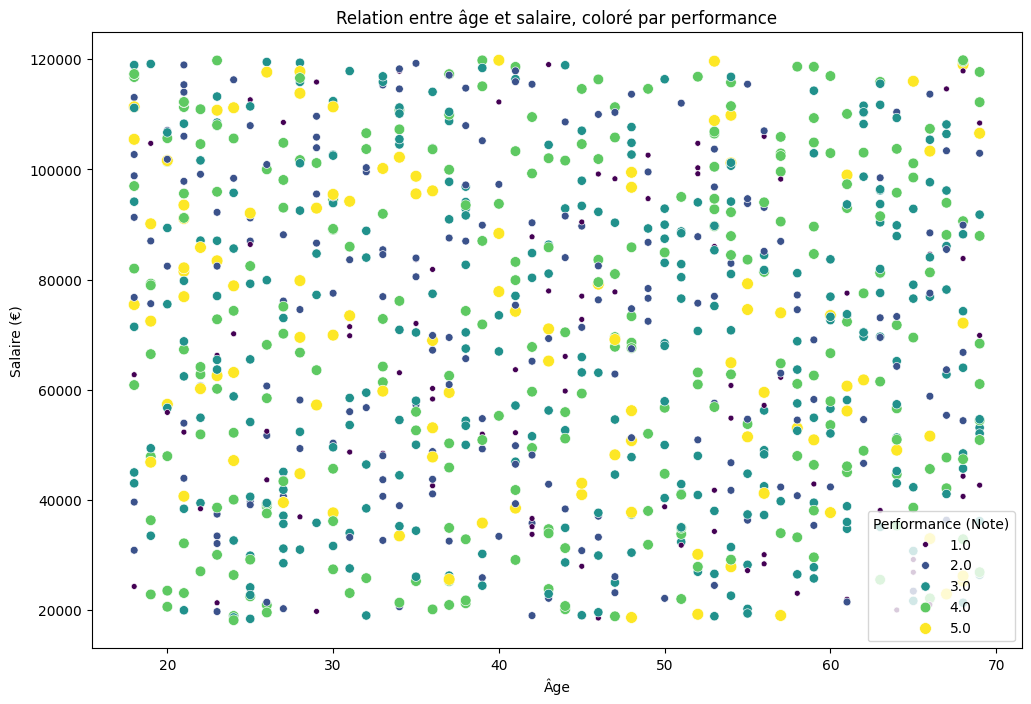

In [43]:
# 43. Scatter plot âge vs salaire coloré par performance
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Âge', y='Salaire (€)', hue='Performance (Note)', data=DataFrame, palette='viridis', size='Performance (Note)')
plt.title('Relation entre âge et salaire, coloré par performance')
plt.show()